In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

(450, 600, 3)
Color del pixel en la posición x= 100 | y= 100: [191  91   9]


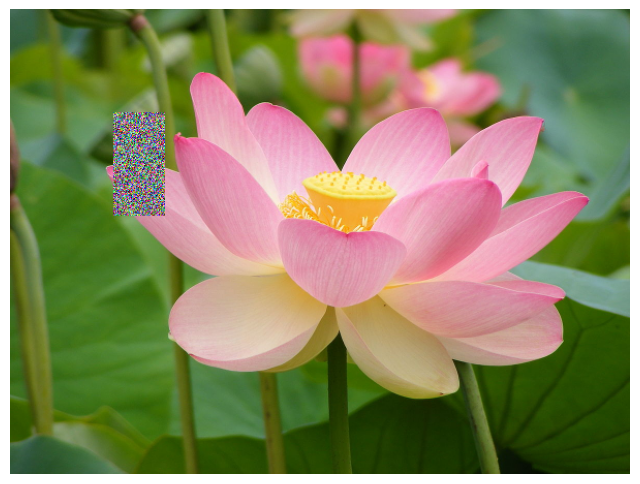

In [2]:
img = cv2.imread('images/imagen_1.jpg')
img = cv2.resize(img, None, fx = .5, fy=.5)

img[100:200, 100:150] = np.random.randint(0, 256, size=(100, 50, 3), dtype=np.uint8)

print(img.shape)

color_pixel = img[100, 100]
print(f'Color del pixel en la posición x= 100 | y= 100: {img[100, 100]}')

f, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()


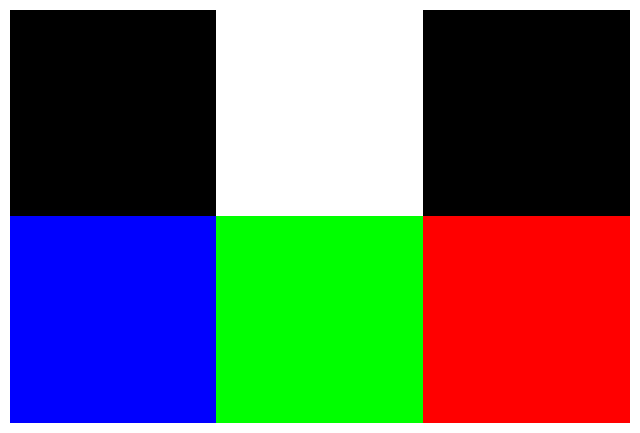

In [3]:
img_easy = np.array([
    [[0, 0, 0], [255, 255, 255], [0, 0, 0]],
    [[255, 0, 0], [0, 255, 0], [0, 0, 255]]
], dtype=np.uint8)

img_resize = cv2.resize(img_easy, (300,200), interpolation = cv2.INTER_CUBIC)

cv2.imshow('Image', img_resize)
cv2.waitKey(0)
cv2.destroyAllWindows()

f, ax = plt.subplots(figsize=(8, 8))
ax.imshow(img_easy)
ax.imshow(cv2.cvtColor(img_easy, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()

In [4]:
from datetime import datetime

cap = cv2.VideoCapture(0)
width = int(cap.get(3))
height = int(cap.get(4))
font = cv2.FONT_HERSHEY_SIMPLEX

while True:
    ret, frame = cap.read()

    now = datetime.now()
    date_time_str = now.strftime("%Y-%m-%d %H:%M:%S")

    overlay = frame.copy()
    cv2.rectangle(frame, (width-210, height-40), (width, height), (128, 128, 128), thickness=-1)

    alpha = 0.3
    frame = cv2.addWeighted(overlay, alpha, frame, 1 - alpha, 0)

    cv2.putText(frame, date_time_str, (width-200, height-15), font, 0.5, (255, 255, 255), 1, cv2.LINE_AA)

    cv2.imshow('frame', frame)

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

width: 640.0 | height: 480.0 | fps: 30.0


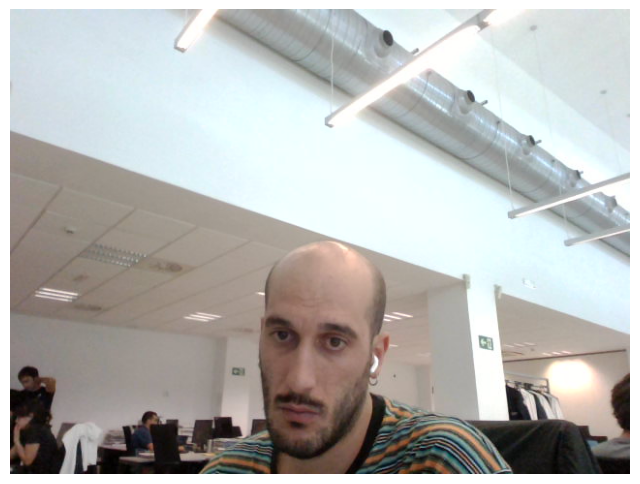

In [5]:
cap = cv2.VideoCapture(0)

ret, frame = cap.read()

width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = cap.get(cv2.CAP_PROP_FPS)

print(f'width: {width} | height: {height} | fps: {fps}')

cap.release()

f, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()


22173


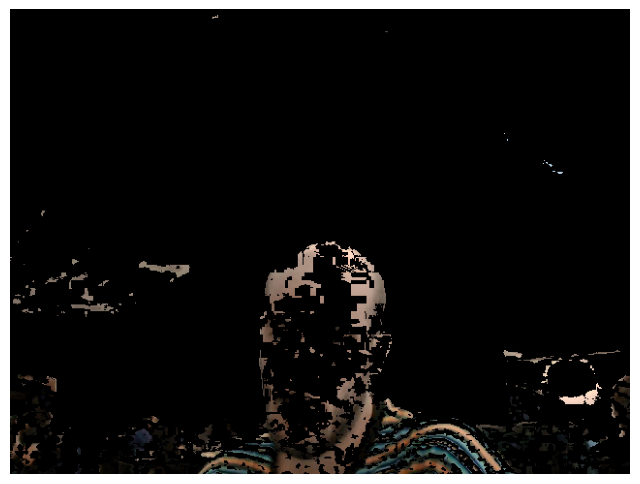

855304
921600


In [25]:
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# lower_col = cv2.cvtColor(np.array([[[35, 90, 74]]], dtype=np.uint8), cv2.COLOR_BGR2HSV)
# upper_col = cv2.cvtColor(np.array([[[3, 183, 248]]], dtype=np.uint8), cv2.COLOR_BGR2HSV)

lower_col = np.array([10, 50, 0])
upper_col = np.array([130, 255, 255])

mask = cv2.inRange(hsv, lower_col, upper_col)

print(np.count_nonzero(mask == 255))
result = cv2.bitwise_and(frame, frame, mask=mask)

f, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
ax.axis('off')
plt.show()
print(np.count_nonzero(result == 0))

print(result.shape[0]*result.shape[1]*result.shape[2])


[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
25


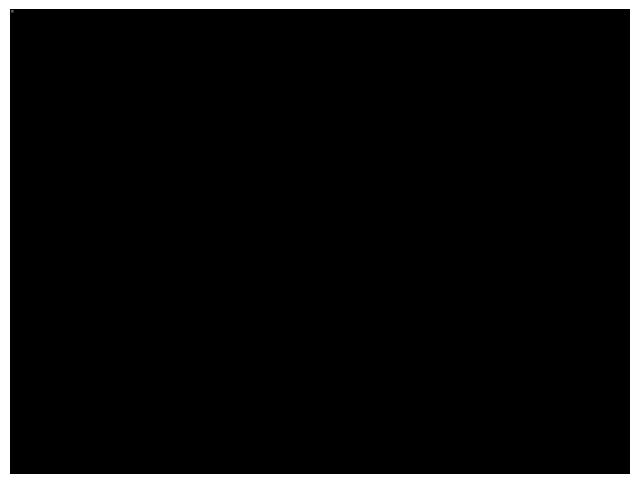

In [26]:
def create_mask(image_path, shape='circle', position=(1, 1), size=50):
    image = cv2.imread(image_path)

    # Crear una imagen en blanco (negra) del mismo tamaño que la imagen original
    mask = np.zeros(image.shape[:2], dtype="uint8")

    if shape == 'circle':
        cv2.circle(mask, position, size, 255, -1)
    elif shape == 'rectangle':
        top_left = position
        bottom_right = (position[0] + size, position[1] + size)
        cv2.rectangle(mask, top_left, bottom_right, 255, -1)

    masked_image = cv2.bitwise_and(image, image, mask=mask)

    print(mask[:10, :10])
    print(np.count_nonzero(mask == 255))

    f, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    plt.show()

    return masked_image

masked_img = create_mask('images/imagen_1.jpg', shape='rectangle', position=(2, 2), size=4)